#Запитання
https://docs.google.com/spreadsheets/d/1MUcaisEhx1GA23fRlONi4h_7Aews1YtR/edit?usp=sharing&ouid=101959502096486530675&rtpof=true&sd=true

>[Запитання](#scrollTo=oqx4mYnCYQ0H)

>[Класифікація](#scrollTo=nEmhzK2qEjfJ)

>>[Логістична функція](#scrollTo=elt_bDZapGSx)

>>[Функція гіпотези](#scrollTo=6w5ZwBVUEahh)

>>[Функція втрат](#scrollTo=8S1rDQRmJ0cZ)

>>>[Крос-ентропія](#scrollTo=nx5Vtf2iW8Nn)

>>[Навчання логістичної регресії](#scrollTo=DuHidbY8Zp4w)

>>>[Реалізація засобами numpy](#scrollTo=0abLy06cWTLA)

>>>[Приклад на наборі даних Breast Cancer](#scrollTo=4zr92VyJWZOn)

>>[Приклад логістичної регресії на наборі даних Iris](#scrollTo=bbgnNVqTFRpF)

>>[Мультикласова класифікація](#scrollTo=dgFVXz_upO8O)

>>>[Стратегія "один проти всіх"](#scrollTo=xspYazxHB3NO)

>>>[Стратегія "один проти одного"](#scrollTo=RiZDmUsFzTDl)

>[Що розглянули?](#scrollTo=lrH898P0Cjlp)

>[Що далі?](#scrollTo=w2LTZCXwCxW7)

>[Домашнє завдання](#scrollTo=zDFA10t-CqWd)

>[Запитання](#scrollTo=lJXpp530C9yJ)



#Класифікація

![picture](https://drive.google.com/uc?id=1znm0oEApJuzX450tTQZpL-UN2bw2DQfE)

https://www.researchgate.net/publication/346091812_Application_of_Deep_Learning_in_Dentistry_and_Implantology

![picture](https://drive.google.com/uc?id=1s72DzjJZzodmPbWjdz2IUv-pdD9nThLR)


![picture](https://drive.google.com/uc?id=1sVYoczs2crUP2hutFjIWdQPu3Pil4G0Q)



![picture](https://drive.google.com/uc?id=1Ozm0LXGBnPUwbhj_goSQQTbS5XdF3hm4)


##Логістична функція

![picture](https://drive.google.com/uc?id=1ElxRpYe4KpAfAEqpjj1n7FRPa8bALlpm)

Похідна

![picture](https://drive.google.com/uc?id=1R3skuEE5AAW3OktuVnfF6RHai9rBJUw8)

Детальніше про обчислення похідної логістичної функції

https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e



##Функція гіпотези

Див. конспект

##Функція втрат

###Крос-ентропія

Розглянемо моделі класифікації декількох спостережень

![picture](https://drive.google.com/uc?id=1SRCbLy2CC9ZdsUVpHUlUkb8W5f7bgzhw)



Логарифмування

![picture](https://drive.google.com/uc?id=1RDYdJ1lULh439Y49rxezz-iZzdQgaTLX)



Таблиця результатів прогнозування

![picture](https://drive.google.com/uc?id=1AraafCln2dQtKaBoU1sdf3xIpbIlHMd2)



Розрахунок Бінарної крос-ентропії (Binary Cross-Entropy )

![picture](https://drive.google.com/uc?id=1lQk3dHEmGsxtj1IzKw-HZHV82lTQad6u)

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a


##Навчання логістичної регресії

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

###Реалізація засобами numpy

Порівняємо наведену програмну реалізацію з формулами з конспекту

In [ ]:
#https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226
class LogitRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        left = y_true * np.log(y_pred + epsilon)
        right = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(left + right)

    # функція гіпотези
    def feed_forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y, A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)




In [ ]:
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

###Приклад на наборі даних Breast Cancer

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
dataset = datasets.load_breast_cancer()
print(dataset.keys())
print(dataset.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data_scaled = data_scale(df, 'std')
df_scaled = pd.DataFrame(data_scaled, columns=[df.columns])


In [ ]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [ ]:
# X, y = dataset.data, dataset.target
X, y = df_scaled, dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

regressor = LogitRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
cm = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
cm

array([[38,  5],
       [ 3, 68]])

In [ ]:
print(classification_report(np.asarray(y_test), np.asarray(predictions)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



###

##Приклад логістичної регресії на наборі даних Iris

![picture](https://drive.google.com/uc?id=1WQMGM4ge-EhZlRDNbDBLD6YjmE7BA4op)

https://www.kaggle.com/code/doreamon11122000/iris-flower-dataset-eda

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_target = pd.DataFrame(iris['target'], columns =[ 'species'])
df = pd.concat([df, df_target], axis=1)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


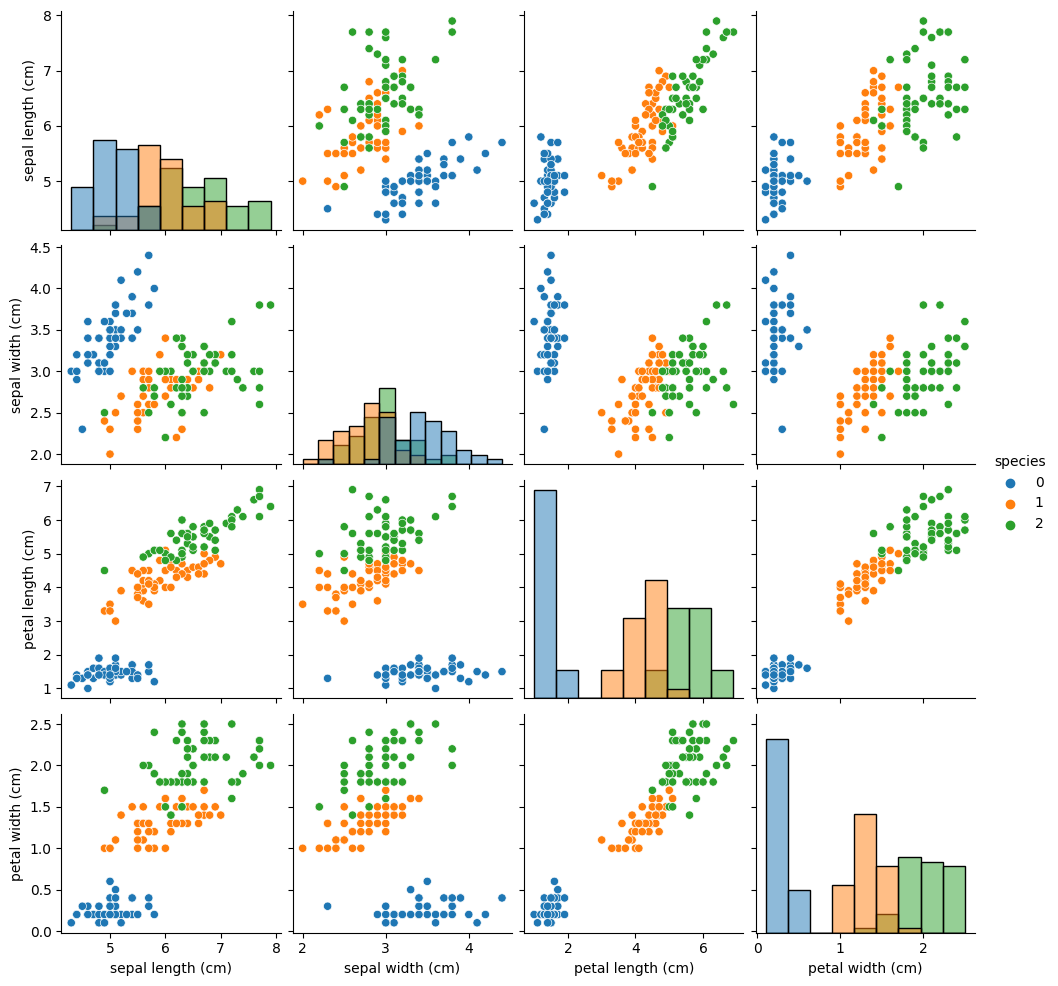

In [ ]:

sns.pairplot(df, hue='species', palette= "tab10", diag_kind='hist')

In [ ]:
X, y = iris.data, iris.target
# X, y = df_scaled, dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

regressor = LogitRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
print(predictions)
# cm = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
# cm

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = clf.predict(X_test)
print(predictions)
print(clf.predict_proba(X_test))
cm = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
cm

[2 1 2 2 0 0 0 0 0 1 2 2 1 1 0 1 1 0 2 2 1 2 1 0 1 1 2 1 0 0]
[[6.05011731e-05 3.86255416e-02 9.61313957e-01]
 [1.21546172e-02 9.63265323e-01 2.45800603e-02]
 [1.41369750e-07 4.00989843e-03 9.95989960e-01]
 [5.34481124e-04 2.82939398e-01 7.16526120e-01]
 [9.76728745e-01 2.32712026e-02 5.24943295e-08]
 [9.75428512e-01 2.45714204e-02 6.79719797e-08]
 [9.70826107e-01 2.91738338e-02 5.93376748e-08]
 [9.72605494e-01 2.73944798e-02 2.65078191e-08]
 [9.63498644e-01 3.65011403e-02 2.15463791e-07]
 [1.78470979e-02 8.67371436e-01 1.14781466e-01]
 [2.63359592e-03 3.89929360e-01 6.07437044e-01]
 [7.40900651e-05 8.12745131e-02 9.18651397e-01]
 [3.64927759e-03 8.74148946e-01 1.22201776e-01]
 [1.99316780e-02 9.09703461e-01 7.03648610e-02]
 [9.73055304e-01 2.69445899e-02 1.06085118e-07]
 [1.46190052e-01 8.48293867e-01 5.51608156e-03]
 [6.82244699e-03 8.24464394e-01 1.68713159e-01]
 [9.83690420e-01 1.63095562e-02 2.42088230e-08]
 [5.22981504e-08 4.51858136e-03 9.95481366e-01]
 [2.77384533e-04 1.2106268

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]])

##Мультикласова класифікація

###Стратегія "один проти всіх"

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr'))
clf = clf.fit(X_train, y_train)

print(clf.n_classes_)

3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
clf.estimators_

[LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0)]

In [ ]:
clf.predict(X_test)
predictions = clf.predict(X_test)
print(predictions)
print(y_test)


[2 1 2 2 0 0 0 0 0 1 2 2 1 1 0 1 1 0 2 2 1 2 1 0 1 1 2 1 0 0]
[2 1 2 1 0 0 0 0 0 1 1 2 1 1 0 1 1 0 2 2 1 2 1 0 1 1 2 1 0 0]


In [ ]:
cm = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
cm


array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]])

###Стратегія "один проти одного"

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC


clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

clf.estimators_



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0))

In [ ]:
prediction = clf.predict(X_test)
print(prediction)

[2 1 2 2 0 0 0 0 0 1 2 2 1 1 0 1 1 0 2 2 1 2 1 0 1 2 2 1 0 0]


In [ ]:
print(y_test)

[2 1 2 1 0 0 0 0 0 1 1 2 1 1 0 1 1 0 2 2 1 2 1 0 1 1 2 1 0 0]


In [ ]:
clf.score(X_test, y_test)

0.9

In [ ]:
cm = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
cm

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  7]])

#Що розглянули?

- Постановку задачі класифікації
- Логістичну регресію
- Функцію втрат: бінарну крос-ентропію
- Програмну реалізацію навчання класифікатора логіт-функції
- Стратегії мультикласової класифікації
- Приклади на наборах даних Iris, Breast Cancer



#Що далі?
- Метрики якості регресії
- Метрики якості класифікації
- Засоби бібліотеки scikit-learn

#Домашнє завдання

#Запитання